<a href="https://colab.research.google.com/github/iam-fern/Generate_addition_2X/blob/main/GQtest_data(y_hat)_add_delta_(1_6)_n120_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_addition_2X/addition_delta_1.6'

In [4]:
os.listdir(base_path)

['data_add_delta_1.6_n20.csv',
 'data_add_delta_1.6_n30.csv',
 'data_add_delta_1.6_n60.csv',
 'data_add_delta_1.6_n120.csv',
 'data_add_delta_1.6_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_1.6_n120.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,48.185460,78.641364,-14.055620,122.771204,139.491701,-16.720497
1,0.0,1.0,45.913305,48.374549,57.928108,162.215962,102.096972,60.118990
2,0.0,2.0,40.232642,65.327580,-2.666297,112.893925,114.918815,-2.024890
3,0.0,3.0,97.005051,86.338141,96.634830,289.978022,205.362544,84.615478
4,0.0,4.0,30.298899,43.321711,20.212140,103.832750,78.054846,25.777905
...,...,...,...,...,...,...,...,...
119995,999.0,115.0,32.890580,86.826525,39.250293,168.967398,124.994294,43.973105
119996,999.0,116.0,78.204690,24.004518,-22.293464,89.915743,113.386265,-23.470521
119997,999.0,117.0,75.704117,62.102693,38.062750,185.869559,145.629115,40.240444
119998,999.0,118.0,61.688476,70.595776,29.638741,171.922994,139.238444,32.684550


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,48.185460,78.641364,-14.055620,122.771204,139.491701,-16.720497
1,0.0,1.0,45.913305,48.374549,57.928108,162.215962,102.096972,60.118990
2,0.0,2.0,40.232642,65.327580,-2.666297,112.893925,114.918815,-2.024890
3,0.0,3.0,97.005051,86.338141,96.634830,289.978022,205.362544,84.615478
4,0.0,4.0,30.298899,43.321711,20.212140,103.832750,78.054846,25.777905
...,...,...,...,...,...,...,...,...
119995,999.0,115.0,32.890580,86.826525,39.250293,168.967398,124.994294,43.973105
119996,999.0,116.0,78.204690,24.004518,-22.293464,89.915743,113.386265,-23.470521
119997,999.0,117.0,75.704117,62.102693,38.062750,185.869559,145.629115,40.240444
119998,999.0,118.0,61.688476,70.595776,29.638741,171.922994,139.238444,32.684550


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2          e           Y       y_hat  \
rep   index                                                            
0.0   0.0    48.185460  78.641364 -14.055620  122.771204  139.491701   
      1.0    45.913305  48.374549  57.928108  162.215962  102.096972   
      2.0    40.232642  65.327580  -2.666297  112.893925  114.918815   
      3.0    97.005051  86.338141  96.634830  289.978022  205.362544   
      4.0    30.298899  43.321711  20.212140  103.832750   78.054846   
...                ...        ...        ...         ...         ...   
999.0 115.0  32.890580  86.826525  39.250293  168.967398  124.994294   
      116.0  78.204690  24.004518 -22.293464   89.915743  113.386265   
      117.0  75.704117  62.102693  38.062750  185.869559  145.629115   
      118.0  61.688476  70.595776  29.638741  171.922994  139.238444   
      119.0  94.181892  48.036100  28.193067  180.411059  151.435792   

                 e_hat  
rep   index             
0.0   0.0   -16.720497  
      1.0    60.118990  
      2.0    -2.024890  
      3.0    84.615478  
      4.0    25.777905  
...                ...  
999.0 115.0  43.973105  
      116.0 -23.470521  
      117.0  40.240444  
      118.0  32.684550  
      119.0  28.975268  

[120000 rows x 6 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2          e           Y       y_hat  \
rep   index                                                            
0.0   0.0    48.185460  78.641364 -14.055620  122.771204  139.491701   
      1.0    45.913305  48.374549  57.928108  162.215962  102.096972   
      2.0    40.232642  65.327580  -2.666297  112.893925  114.918815   
      3.0    97.005051  86.338141  96.634830  289.978022  205.362544   
      4.0    30.298899  43.321711  20.212140  103.832750   78.054846   
...                ...        ...        ...         ...         ...   
999.0 115.0  32.890580  86.826525  39.250293  168.967398  124.994294   
      116.0  78.204690  24.004518 -22.293464   89.915743  113.386265   
      117.0  75.704117  62.102693  38.062750  185.869559  145.629115   
      118.0  61.688476  70.595776  29.638741  171.922994  139.238444   
      119.0  94.181892  48.036100  28.193067  180.411059  151.435792   

                 e_hat  
rep   index             
0.0   0.0   -16.720497  
      1.0    60.118990  
      2.0    -2.024890  
      3.0    84.615478  
      4.0    25.777905  
...                ...  
999.0 115.0  43.973105  
      116.0 -23.470521  
      117.0  40.240444  
      118.0  32.684550  
      119.0  28.975268  

[120000 rows x 6 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,48.185460,78.641364,-14.055620,122.771204,139.491701,-16.720497
1,0.0,1.0,45.913305,48.374549,57.928108,162.215962,102.096972,60.118990
2,0.0,2.0,40.232642,65.327580,-2.666297,112.893925,114.918815,-2.024890
3,0.0,3.0,97.005051,86.338141,96.634830,289.978022,205.362544,84.615478
4,0.0,4.0,30.298899,43.321711,20.212140,103.832750,78.054846,25.777905
...,...,...,...,...,...,...,...,...
119995,999.0,115.0,32.890580,86.826525,39.250293,168.967398,124.994294,43.973105
119996,999.0,116.0,78.204690,24.004518,-22.293464,89.915743,113.386265,-23.470521
119997,999.0,117.0,75.704117,62.102693,38.062750,185.869559,145.629115,40.240444
119998,999.0,118.0,61.688476,70.595776,29.638741,171.922994,139.238444,32.684550


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2          e           Y       y_hat  \
rep   index                                                            
0.0   0.0    48.185460  78.641364 -14.055620  122.771204  139.491701   
      1.0    45.913305  48.374549  57.928108  162.215962  102.096972   
      2.0    40.232642  65.327580  -2.666297  112.893925  114.918815   
      3.0    97.005051  86.338141  96.634830  289.978022  205.362544   
      4.0    30.298899  43.321711  20.212140  103.832750   78.054846   
...                ...        ...        ...         ...         ...   
999.0 115.0  32.890580  86.826525  39.250293  168.967398  124.994294   
      116.0  78.204690  24.004518 -22.293464   89.915743  113.386265   
      117.0  75.704117  62.102693  38.062750  185.869559  145.629115   
      118.0  61.688476  70.595776  29.638741  171.922994  139.238444   
      119.0  94.181892  48.036100  28.193067  180.411059  151.435792   

                 e_hat  
rep   index             
0.0   0.0   -16.720497  
      1.0    60.118990  
      2.0    -2.024890  
      3.0    84.615478  
      4.0    25.777905  
...                ...  
999.0 115.0  43.973105  
      116.0 -23.470521  
      117.0  40.240444  
      118.0  32.684550  
      119.0  28.975268  

[120000 rows x 6 columns]

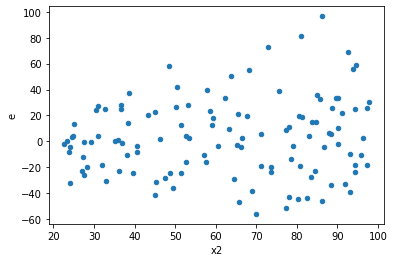

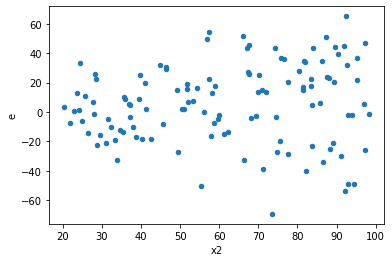

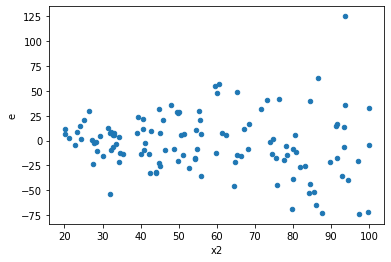

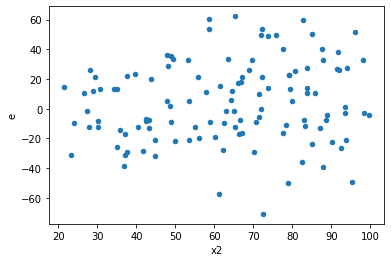

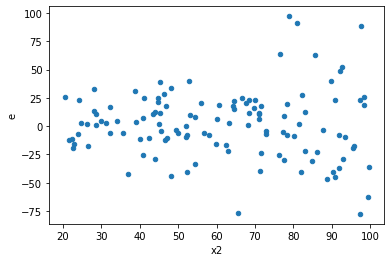

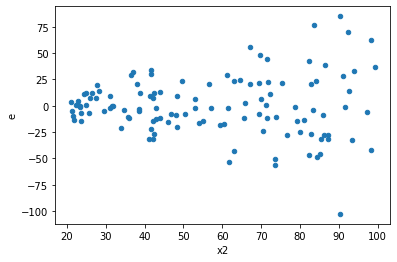

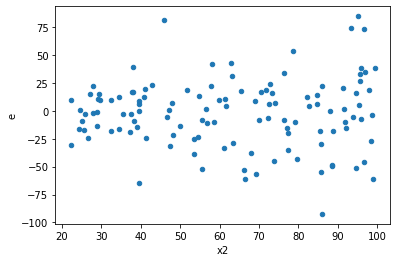

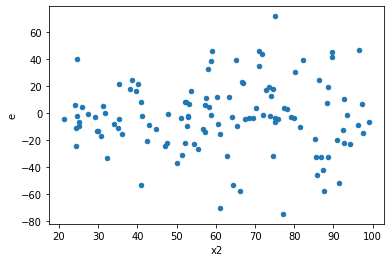

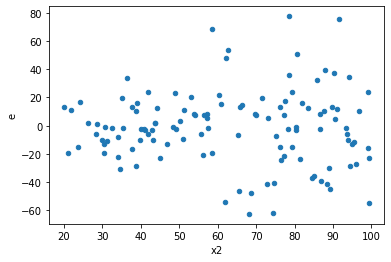

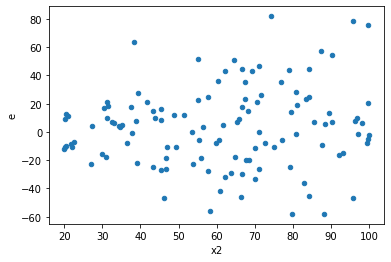

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม y_hat
    new_table_sort = new_table.sort_values('y_hat')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,46.0,46.0,26064.635370712742,50559.77449912413,566.6225080589727,1099.125532589655,1.9397844543006764,0.02676758826516079,0.9866162058674196,0.013383794132580396,Reject005=0 : Heteroscedasticity
1.0,46.0,46.0,16390.567577334477,49825.92136891221,356.31668646379296,1083.1722036720046,3.0399143369393418,0.0002521450346653076,0.9998739274826673,0.0001260725173326538,Reject005=0 : Heteroscedasticity
2.0,46.0,46.0,24249.639238183565,67463.12392739067,527.1660703952949,1466.5896505954493,2.7820258794268162,0.0007242734236094783,0.9996378632881953,0.00036213671180473916,Reject005=0 : Heteroscedasticity
3.0,46.0,46.0,23086.513756622488,33367.18976509319,501.88073383961927,725.3736905455042,1.44531089088848,0.21541431095004437,0.8922928445249778,0.10770715547502219,Reject005=1 : Homoscedasticity
4.0,46.0,46.0,25050.989166618343,54192.88516435469,544.5867210134422,1178.1061992251018,2.163303205470598,0.010126191350478209,0.9949369043247609,0.005063095675239104,Reject005=0 : Heteroscedasticity
5.0,46.0,46.0,13388.229980316817,69136.62979779611,291.0484778329743,1502.9702129955676,5.163985821833042,1.3827705158675485e-07,0.9999999308614742,6.913852579337743e-08,Reject005=0 : Heteroscedasticity
6.0,46.0,46.0,22633.746117311726,65899.4790629929,492.03795907199407,1432.5973709346283,2.911558639980891,0.0004246931136324683,0.9997876534431838,0.00021234655681623416,Reject005=0 : Heteroscedasticity
7.0,46.0,46.0,14878.718480462818,37184.127901236316,323.4504017491917,808.3506065486156,2.4991485624291254,0.002381549569610897,0.9988092252151946,0.0011907747848054484,Reject005=0 : Heteroscedasticity
8.0,46.0,46.0,19998.813382396263,32775.94596688073,434.75681266078834,712.5205644974072,1.6388945353993551,0.09733389411105353,0.9513330529444732,0.048666947055526766,Reject005=1 : Homoscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,46.0,46.0,26064.635370712742,50559.77449912413,566.6225080589727,1099.125532589655,1.9397844543006764,0.02676758826516079,Reject005=0 : Heteroscedasticity
1.0,46.0,46.0,16390.567577334477,49825.92136891221,356.31668646379296,1083.1722036720046,3.0399143369393418,0.0002521450346653076,Reject005=0 : Heteroscedasticity
2.0,46.0,46.0,24249.639238183565,67463.12392739067,527.1660703952949,1466.5896505954493,2.7820258794268162,0.0007242734236094783,Reject005=0 : Heteroscedasticity
3.0,46.0,46.0,23086.513756622488,33367.18976509319,501.88073383961927,725.3736905455042,1.44531089088848,0.21541431095004437,Reject005=1 : Homoscedasticity
4.0,46.0,46.0,25050.989166618343,54192.88516435469,544.5867210134422,1178.1061992251018,2.163303205470598,0.010126191350478209,Reject005=0 : Heteroscedasticity
5.0,46.0,46.0,13388.229980316817,69136.62979779611,291.0484778329743,1502.9702129955676,5.163985821833042,1.3827705158675485e-07,Reject005=0 : Heteroscedasticity
6.0,46.0,46.0,22633.746117311726,65899.4790629929,492.03795907199407,1432.5973709346283,2.911558639980891,0.0004246931136324683,Reject005=0 : Heteroscedasticity
7.0,46.0,46.0,14878.718480462818,37184.127901236316,323.4504017491917,808.3506065486156,2.4991485624291254,0.002381549569610897,Reject005=0 : Heteroscedasticity
8.0,46.0,46.0,19998.813382396263,32775.94596688073,434.75681266078834,712.5205644974072,1.6388945353993551,0.09733389411105353,Reject005=1 : Homoscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject005=0 : Heteroscedasticity    731
Reject005=1 : Homoscedasticity      269
Name: Result_test, dtype: int64